Kaynak
 - [link](https://www.kaggle.com/mnpathak1/fraud-detection-analysis-with-nn)

In [43]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
df = pd.read_excel('sahtecilik.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14708 entries, 0 to 14707
Data columns (total 31 columns):
Time      14708 non-null int64
V1        14708 non-null float64
V2        14708 non-null float64
V3        14708 non-null float64
V4        14708 non-null float64
V5        14708 non-null float64
V6        14708 non-null float64
V7        14708 non-null float64
V8        14708 non-null float64
V9        14708 non-null float64
V10       14708 non-null float64
V11       14708 non-null float64
V12       14708 non-null float64
V13       14708 non-null float64
V14       14708 non-null float64
V15       14708 non-null float64
V16       14708 non-null float64
V17       14708 non-null float64
V18       14708 non-null float64
V19       14708 non-null float64
V20       14708 non-null float64
V21       14708 non-null float64
V22       14708 non-null float64
V23       14708 non-null float64
V24       14708 non-null float64
V25       14708 non-null float64
V26       14708 non-null float64
V2

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,65617,-1.223560,-0.616085,2.391712,-1.618031,-0.303234,-0.701199,0.103205,-0.089820,-1.035075,...,0.405956,1.031523,-0.019859,0.418614,0.461850,-0.194119,0.088336,-0.079650,103.00,0
1,40846,0.847852,-0.354261,0.339220,1.447672,-0.436064,0.038825,0.064058,0.152858,0.189459,...,0.030245,-0.077474,-0.152901,0.205123,0.514422,-0.352412,0.003026,0.028441,142.22,0
2,129826,-0.744838,0.873659,3.135126,4.489845,-0.574433,1.086870,-0.597055,0.569046,-0.991034,...,0.211562,0.601728,-0.156633,-0.011702,-0.055699,0.564760,0.370230,0.176133,38.82,0
3,148614,2.178983,-1.782342,-0.710779,-1.588412,-1.555033,-0.187900,-1.523770,0.105126,-0.606861,...,-0.419091,-0.997873,0.450296,0.279460,-0.664758,-0.493022,0.010028,-0.026954,69.00,0
4,155160,2.109017,0.028295,-2.410260,0.232724,0.924610,-0.995066,0.826068,-0.533862,0.367386,...,0.090419,0.450799,-0.242338,-0.938192,0.702172,-0.011330,-0.057583,-0.077789,38.95,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print ("-- Fraud --")
print (df.Time[df.Class == 1].describe())
print ()
print ("-- Normal --")
print (df.Time[df.Class == 0].describe())

-- Fraud --
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

-- Normal --
count     14216.000000
mean      95015.632386
std       47506.723530
min          41.000000
25%       54328.250000
50%       85302.500000
75%      139273.250000
max      172785.000000
Name: Time, dtype: float64


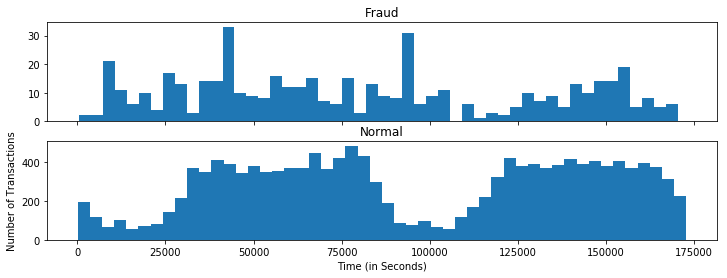

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [8]:
24*60*60

86400

In [9]:
df.Time.describe()

count     14708.000000
mean      94538.323293
std       47585.340882
min          41.000000
25%       53935.000000
50%       85008.000000
75%      139058.000000
max      172785.000000
Name: Time, dtype: float64

In [10]:
172785/86400 # 2 gunluk veri

1.999826388888889

In [11]:
def showFeatures(v_from = 1, v_to = 4):
    #Select only the anonymized features.
    v_features = df.iloc[:,v_from:v_to].columns

    plt.figure(figsize=(12,28*4))
    gs = gridspec.GridSpec(28, 1)
    for i, cn in enumerate(df[v_features]):
        ax = plt.subplot(gs[i])
        sns.distplot(df[cn][df.Class == 1], bins=50)
        sns.distplot(df[cn][df.Class == 0], bins=50)
        ax.set_xlabel('')
        plt.legend(["Sahte","Normal"])
        ax.set_title('histogram of feature: ' + str(cn))

    plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


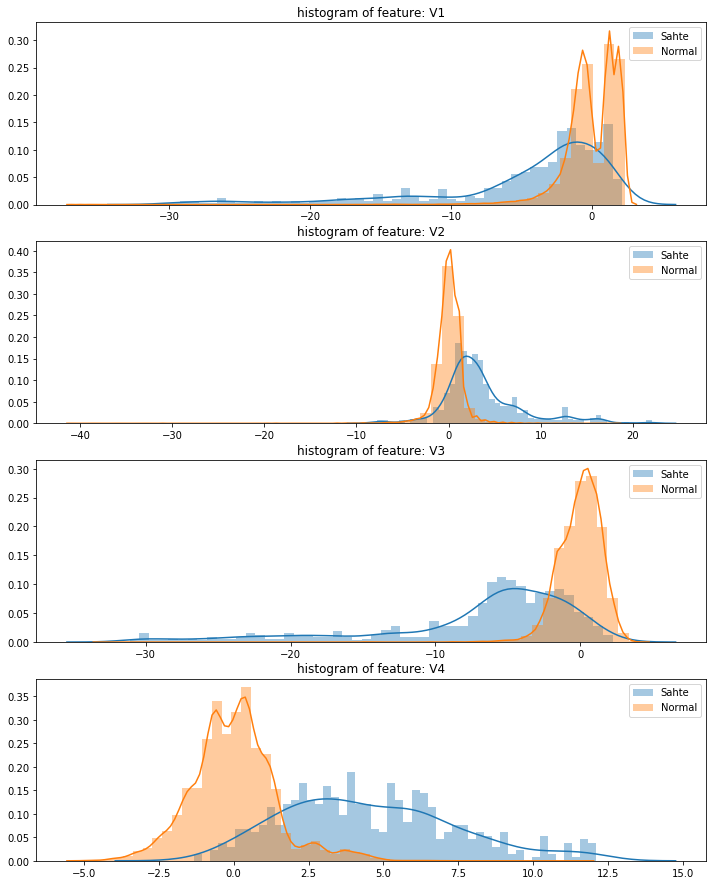

In [12]:
showFeatures(v_from = 1, v_to = 5)

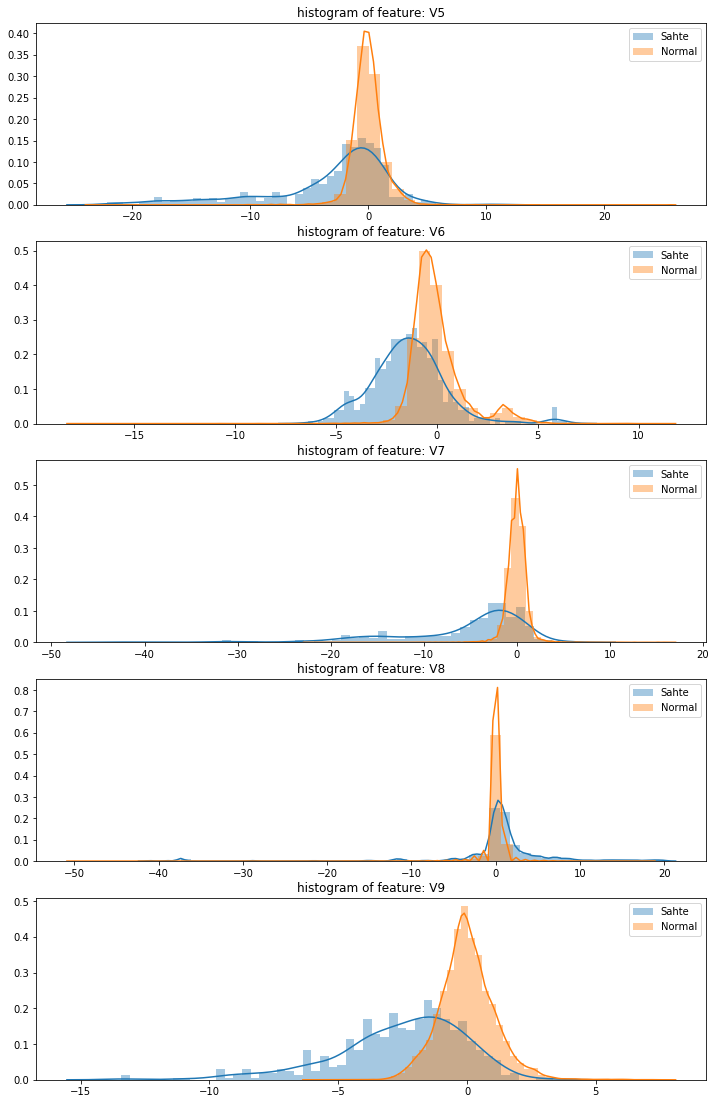

In [13]:
showFeatures(v_from = 5, v_to = 10)

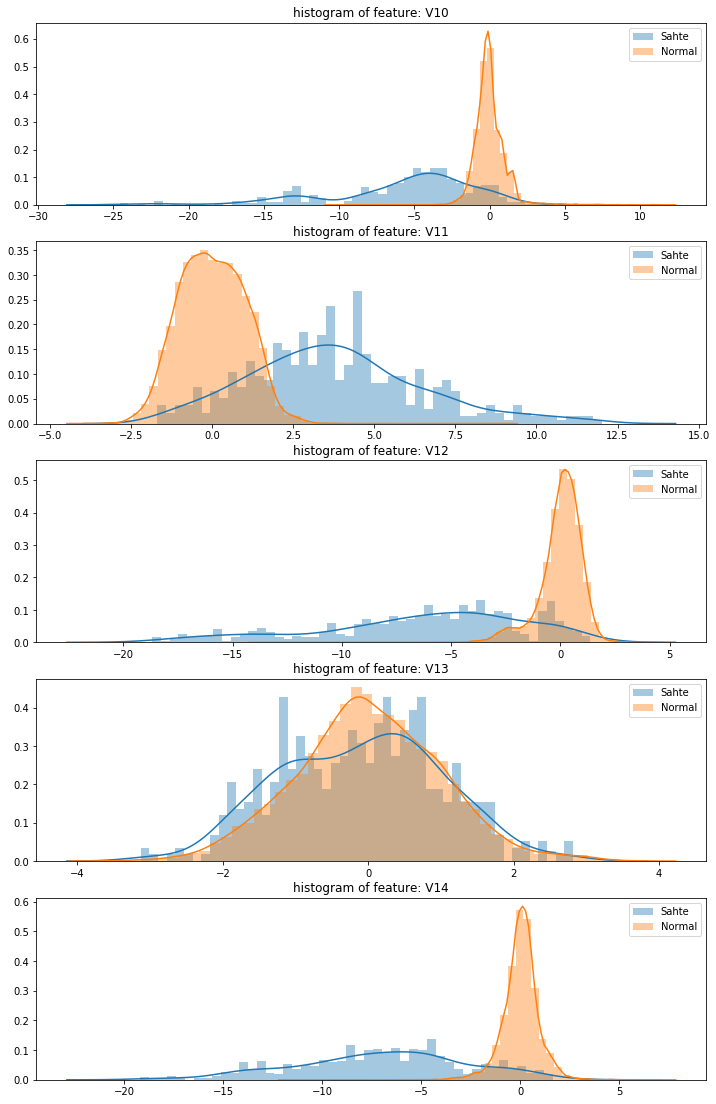

In [15]:
showFeatures(v_from = 10, v_to = 15)

In [45]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [46]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# fix random seed for reproducibility
np.random.seed(2)

model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(2, activation='softmax'))  # With 2 outputs

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                1984      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
__________

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(X_train, Y_train, batch_size=2048, epochs=10)

Epoch 1/10
13237/13237 [==============================] - 0s 6us/step - loss: 1.3472 - acc: 0.8163
Epoch 2/10
13237/13237 [==============================] - 0s 5us/step - loss: 1.1410 - acc: 0.8434
Epoch 3/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.9663 - acc: 0.8654
Epoch 4/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.8609 - acc: 0.8823
Epoch 5/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.8330 - acc: 0.8885
Epoch 6/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.7530 - acc: 0.9062
Epoch 7/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.6952 - acc: 0.9087
Epoch 8/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.6723 - acc: 0.9155
Epoch 9/10
13237/13237 [==============================] - 0s 5us/step - loss: 0.6290 - acc: 0.9221
Epoch 10/10
13237/13237 [==============================] - 0s 6us/step - loss: 0.5885 - acc: 0.9263


In [53]:
score, acc = model.evaluate(X_test, Y_test)
print('Test score:', score)
print('Test accuracy:', acc)

1471/1471 [==============================] - 0s 122us/step
Test score: 0.25961610849599787
Test accuracy: 0.9673691366417403


In [54]:
history = model.fit(X_train, Y_train, batch_size = 2048, epochs = 20, 
         validation_data = (X_test, Y_test), verbose = 2)

Train on 13237 samples, validate on 1471 samples
Epoch 1/20
 - 0s - loss: 0.6056 - acc: 0.9269 - val_loss: 0.2553 - val_acc: 0.9674
Epoch 2/20
 - 0s - loss: 0.5731 - acc: 0.9322 - val_loss: 0.2515 - val_acc: 0.9674
Epoch 3/20
 - 0s - loss: 0.5585 - acc: 0.9362 - val_loss: 0.2480 - val_acc: 0.9674
Epoch 4/20
 - 0s - loss: 0.5442 - acc: 0.9365 - val_loss: 0.2459 - val_acc: 0.9674
Epoch 5/20
 - 0s - loss: 0.5359 - acc: 0.9396 - val_loss: 0.2438 - val_acc: 0.9674
Epoch 6/20
 - 0s - loss: 0.5267 - acc: 0.9427 - val_loss: 0.2389 - val_acc: 0.9674
Epoch 7/20
 - 0s - loss: 0.5104 - acc: 0.9428 - val_loss: 0.2348 - val_acc: 0.9674
Epoch 8/20
 - 0s - loss: 0.5266 - acc: 0.9437 - val_loss: 0.2317 - val_acc: 0.9674
Epoch 9/20
 - 0s - loss: 0.4821 - acc: 0.9498 - val_loss: 0.2279 - val_acc: 0.9674
Epoch 10/20
 - 0s - loss: 0.5050 - acc: 0.9476 - val_loss: 0.2238 - val_acc: 0.9674
Epoch 11/20
 - 0s - loss: 0.4837 - acc: 0.9503 - val_loss: 0.2199 - val_acc: 0.9674
Epoch 12/20
 - 0s - loss: 0.4611 - a

In [55]:
# Check the history keys
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

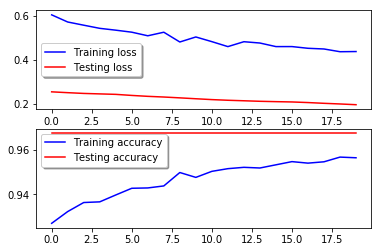

In [56]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [59]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

confusion_mtx

array([[1423,    0],
       [  48,    0]])